<a href="https://colab.research.google.com/github/cykim8811/SoundQuality/blob/main/SQR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sound Quality Improvement
 This projects aims to create a neural network model that makes the sound output from a speaker similar to the sound from a real sound source.

Project Settings

In [1]:
n_fft = 512

## Preprocessing

### 1. Load Data

#### 1.1 Import modules, mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import librosa
from drive.MyDrive.DeepLearning.Tools.soundmanager import *
import matplotlib.pyplot as plt
from IPython.display import clear_output

#### 1.2 Load sound data from files

In [4]:
sd1 = SoundData.loadFromFile("drive/MyDrive/DeepLearning/Dataset/Blueming_IU.mp3", n_fft=n_fft).sample_by_stft_index(300, 2000)
sd2 = SoundData.loadFromFile("drive/MyDrive/DeepLearning/Dataset/MS_Blueming_IU.m4a", n_fft=n_fft).sample_by_stft_index(300, 2000)
sd1.play()
sd2.play()

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


#### 1.3 Synchronize Sound Datas

Synchronize by fourier transformed amplitudes



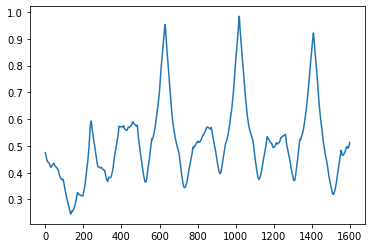

Offset: 219

Sound Data 1:


Sound Data 2:



Sound Datas Combined:


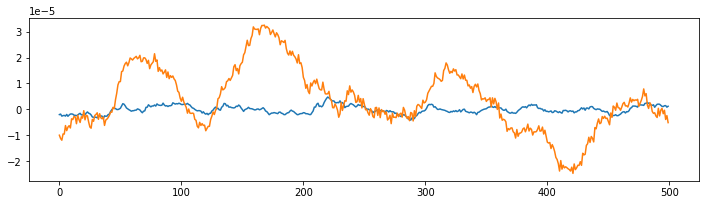

In [5]:
print("Synchronize by fourier transformed amplitudes\n")
offset = synchronize_by_amp(sd1, sd2, 800, 800)
print(f"Offset: {offset}\n")

# Check the sound datas
print("Sound Data 1:")
sd1.play()
print("Sound Data 2:")
sd2.play()

# Combined sound for test
print("\nSound Datas Combined:")
sd_combined = SoundData(sd1.fr)
sd_combined.raw = sd1.raw + sd2.raw
sd_combined.play()

# Check sound wave
plt.figure(figsize=(12, 3))
sd1.plot(13700, 500)
sd2.plot(13700, 500)
plt.show()

Synchronize by sound wave datas



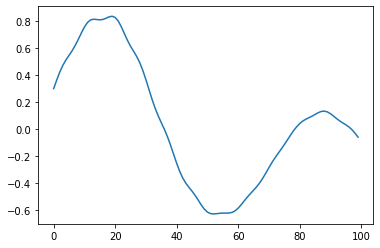

Offset: -31

SD1 + SD2


SD1 - SD2


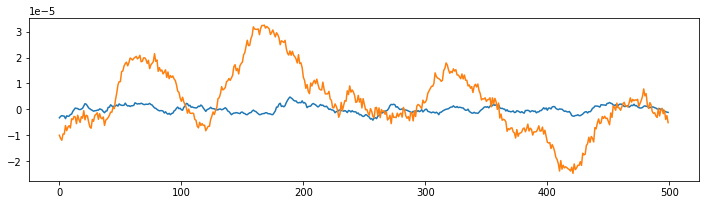

In [6]:
print("Synchronize by sound wave datas\n")
offset = synchronize_by_raw(sd1, sd2, 50, 800)
print(f"Offset: {offset}\n")

# Combined sound for test
print("SD1 + SD2")
sd_combined = SoundData(sd1.fr)
sd_combined.raw = sd1.raw + sd2.raw
sd_combined.play()

print("SD1 - SD2")
sd_combined = SoundData(sd1.fr)
sd_combined.raw = sd1.raw - sd2.raw
sd_combined.play()

# Check sound wave
plt.figure(figsize=(12, 3))
sd1.plot(13700, 500)
sd2.plot(13700, 500)
plt.show()

#### 1.4 Slice datas into pieces

In [7]:
chunk_size = 500
sample_length = 50000 # Sample size for comparing

In [8]:
sd1_chunks = []
sd2_chunks = []
offset_log = []

sd1_temp = SoundData(sd1.fr, sd1.n_fft)
sd1_temp.raw = sd1.raw.copy()
sd1.process()
sd2_temp = SoundData(sd2.fr, sd2.n_fft)
sd2_temp.raw = sd2.raw.copy()
sd2.process()

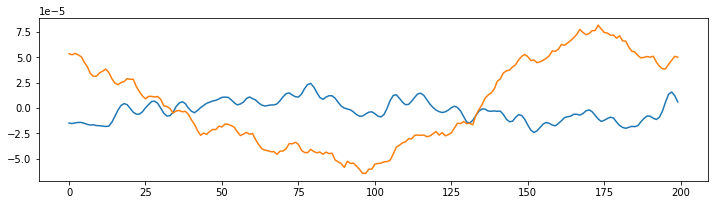

Offset: 0


In [9]:
while min(sd1_temp.raw.shape[0], sd2_temp.raw.shape[0]) > chunk_size * 2 + sample_length:
  print(sd1_temp.raw.shape, sd2_temp.raw.shape)
  sd1_chunks.append(sd1.sample_by_raw_index(0, chunk_size))
  sd2_chunks.append(sd2.sample_by_raw_index(0, chunk_size))
  sd1_temp = sd1_temp.sample_by_raw_index(chunk_size, None)
  sd2_temp = sd2_temp.sample_by_raw_index(chunk_size, None)
  offset = synchronize_by_raw(sd1_temp, sd2_temp, 3, sample_length, no_crop=True)
  clear_output(wait=True)
  offset_log.append(offset)
  if len(offset_log) > 3 and all([t==offset for t in offset_log[-5:-1]]):
    synchronize_by_raw(sd1_temp, sd2_temp, 3, sample_length, display_graph=False)
  # Check sound wave
  plt.figure(figsize=(12, 3))
  sd1_temp.plot(0, 200)
  sd2_temp.plot(0, 200)
  plt.show()
  print("Offset:", offset)


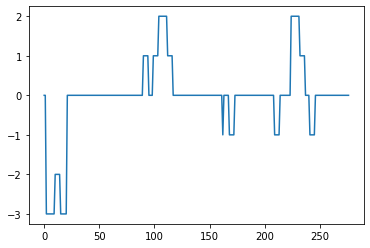

In [10]:
plt.plot(offset_log)
plt.show()